# Business Understanding

## Project Domain

## Problem Statements

## Goals

## Solution Statements

# Data Understanding

## Import data dari kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rifkins","key":"b9dbf40b17cb9a085105c6fd395fe2a9"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [5]:
!kaggle datasets download -d rkiattisak/sports-car-prices-dataset

Dataset URL: https://www.kaggle.com/datasets/rkiattisak/sports-car-prices-dataset
License(s): Attribution 4.0 International (CC BY 4.0)


In [6]:
!mkdir sports-car-prices-dataset
!unzip sports-car-prices-dataset.zip -d sports-car-prices-dataset
!ls sports-car-prices-dataset

Archive:  sports-car-prices-dataset.zip
  inflating: sports-car-prices-dataset/Sport car price.csv  
'Sport car price.csv'


## Import Library yang dibutuhkan

In [226]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [144]:
df = pd.read_csv("sports-car-prices-dataset/Sport car price.csv")

In [145]:
df.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


## Exploratory Data Analysis

In [20]:
numerical_features = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_features].corr()

In [21]:
print(correlation_matrix)

      Year
Year   1.0


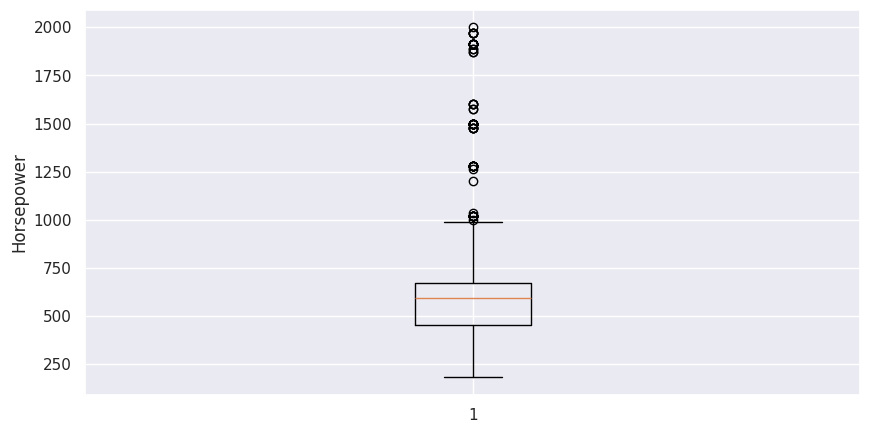

In [25]:
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors='coerce')
df = df.dropna(subset=['Horsepower'])

fig = plt.figure(figsize=(10, 5))
sns.set_theme(style="darkgrid")
plt.boxplot(df["Horsepower"])
plt.ylabel("Horsepower")
plt.show()

<Axes: xlabel='Horsepower', ylabel='Price (in USD)'>

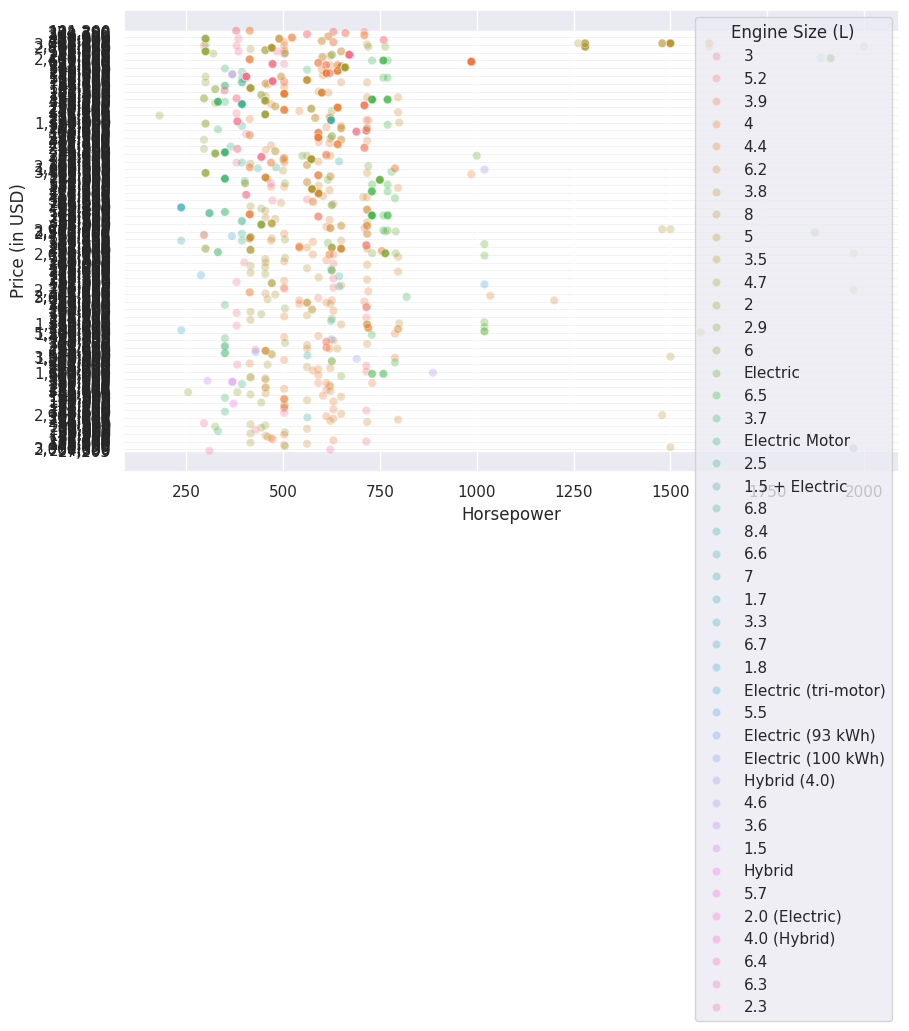

In [28]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df,
                x="Horsepower",
                y = "Price (in USD)",
                hue = "Engine Size (L)", alpha = 0.3
               )

<Axes: xlabel='Engine Size (L)', ylabel='Price (in USD)'>

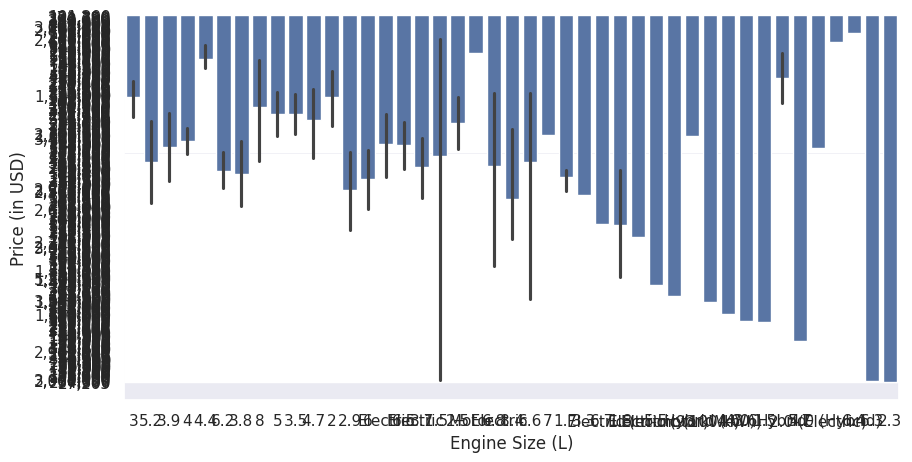

In [30]:
fig = plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
sns.barplot(
    data = df,
    x = "Engine Size (L)",
    y = "Price (in USD)"
)

<Axes: >

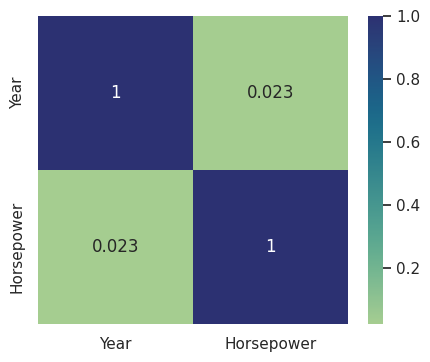

In [34]:
plt.figure(figsize=(5,4))
num_df = df.select_dtypes(include=np.number)
sns.heatmap(num_df.corr(), annot=True, cmap = "crest")

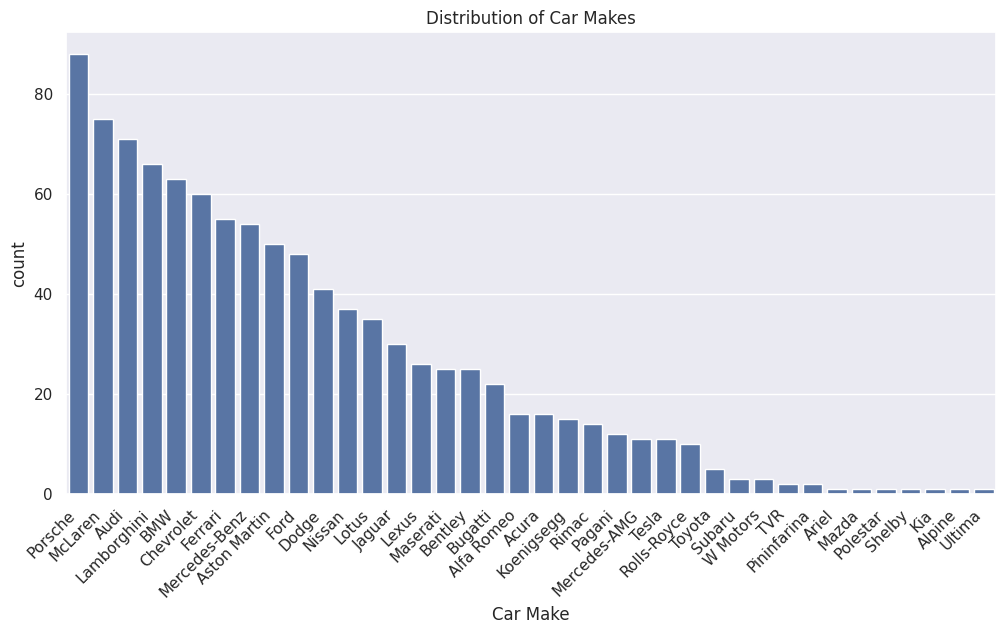

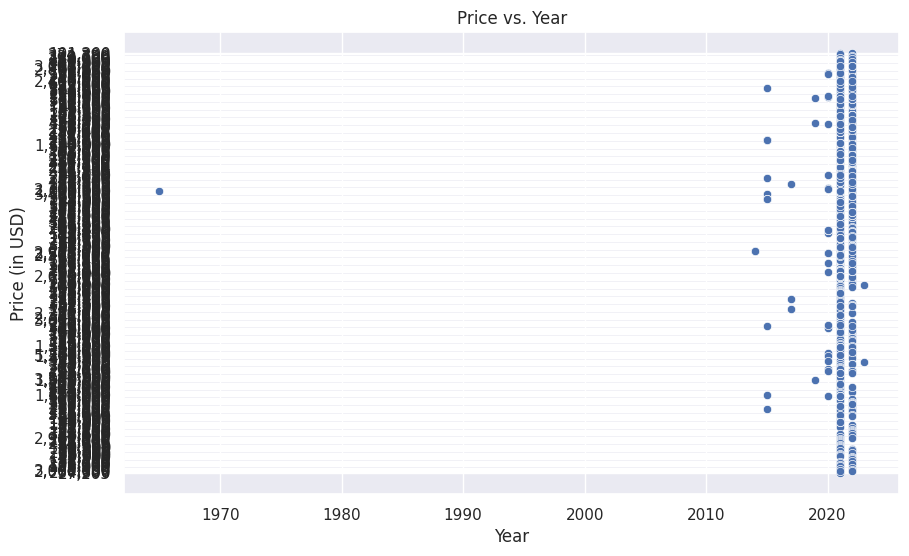

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Car Make', order=df['Car Make'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Car Makes')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Year', y='Price (in USD)')
plt.title('Price vs. Year')
plt.show()

# Data Preparation

In [232]:
y = y.values.reshape(-1, 1)

In [233]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
y = scaler.transform(y)

In [245]:
n_lookback = 4
n_forecast = 4

X = []
Y = []

for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append (y[i - n_lookback: i])
    Y.append (y[i: i + n_forecast])

In [244]:
df.head()

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Car_Make_370Z Coupe,Car_Make_370Z Nismo,Car_Make_400Z,...,Car_Make_Urus,Car_Make_Vantage,Car_Make_Viper,Car_Make_Viper ACR,Car_Make_WRX STI,Car_Make_Wraith,Car_Make_Z4 M40i,Car_Make_Z4 Roadster,Car_Make_i8,Car_Model_True
0,Porsche,3.0,NaN,379,331,4,101200,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Lamborghini,2.0,NaN,630,443,2.8,274390,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Ferrari,3.0,NaN,661,561,3,333750,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Audi,3.0,NaN,562,406,3.2,142700,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,McLaren,2.0,NaN,710,568,2.7,298000,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Modeling

In [235]:
rfr = RandomForestRegressor(n_estimators = 1000, random_state= 1, n_jobs=-1)
rfr.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=1)

In [236]:
yrfr_pred = rfr.predict(x_test)

In [237]:
print("R2 score:", r2_score(y_test, yrfr_pred))
print("----------------------------------------")
rmse_test = mean_squared_error(y_test, yrfr_pred) ** 0.5
print("RMSE test set: ", rmse_test)
print("----------------------------------------")
rmse_train = mean_squared_error(y_train, rfr.predict(x_train)) ** 0.5
print("RMSE train set: ", rmse_train)
print("----------------------------------------")
print("MAE:", mean_absolute_error(y_test, yrfr_pred))

R2 score: 0.8388256436367258
----------------------------------------
RMSE test set:  275329.6783691362
----------------------------------------
RMSE train set:  219453.5838226925
----------------------------------------
MAE: 94952.19215021977


# Evaluation

In [238]:
models = []
models.append(("Linear Regression: ", LinearRegression()))
models.append(("RandomForest Regression: ", RandomForestRegressor(n_estimators = 1000, random_state= 0)))
models.append(("SupportVector Regression: ", SVR(kernel="linear")))
models

[('Linear Regression: ', LinearRegression()),
 ('RandomForest Regression: ',
  RandomForestRegressor(n_estimators=1000, random_state=0)),
 ('SupportVector Regression: ', SVR(kernel='linear'))]

In [239]:
[('Linear Regression: ', LinearRegression()),
 ('RandomForest Regression: ',
  RandomForestRegressor(n_estimators=1000, random_state=0)),
 ('SupportVector Regression: ', SVR(kernel='linear'))]

[('Linear Regression: ', LinearRegression()),
 ('RandomForest Regression: ',
  RandomForestRegressor(n_estimators=1000, random_state=0)),
 ('SupportVector Regression: ', SVR(kernel='linear'))]

In [240]:
results = dict()
scores = []
for name, model in models:
    cv_results = -1 * cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv= 10)
    scores.append((name, cv_results))
    results[name] = (cv_results.mean(), cv_results.std())

In [241]:
for name, score in scores:
    print(name,score)
    print("----------------------------------------")

Linear Regression:  [7.19229500e+10 2.09523421e+11 1.71858118e+10 1.89228455e+10
 4.52854301e+10 1.85546438e+11 2.68905428e+10 1.82107263e+11
 1.77069023e+10 7.23421452e+10]
----------------------------------------
RandomForest Regression:  [6.07748270e+10 2.03841231e+11 1.25533814e+10 5.07479588e+10
 4.24535482e+10 2.11677569e+11 6.14615387e+10 1.53096665e+11
 1.87136026e+10 3.04965978e+10]
----------------------------------------
SupportVector Regression:  [6.01512402e+11 6.49891371e+11 9.46554567e+11 3.76337476e+11
 5.99919417e+11 9.93633094e+11 7.44664571e+11 6.50990728e+11
 4.29038902e+11 2.87252874e+11]
----------------------------------------


In [242]:
print("name                  result.mean()       result.std()")
print("----                  -------------       ------------")
for key, value in results.items():
    print(key, value)
    print("---------------------")

name                  result.mean()       result.std()
----                  -------------       ------------
Linear Regression:  (np.float64(84743374959.33095), np.float64(73364386844.91245))
---------------------
RandomForest Regression:  (np.float64(84581691953.73213), np.float64(71793587103.0407))
---------------------
SupportVector Regression:  (np.float64(627979540326.3575), np.float64(216864302060.88574))
---------------------


# Deployment

## Model Simulation

In [219]:
sample_input = x_test[0].reshape(1, -1)
simulated_price = rfr.predict(sample_input)
print("Simulated Price:", simulated_price[0])
num_simulations = 5
for i in range(num_simulations):
  sample_input = x_test[i].reshape(1, -1)
  simulated_price = rfr.predict(sample_input)
  print(f"Simulation {i+1}: Simulated Price = {simulated_price[0]}")

Simulated Price: 165232.41142478638
Simulation 1: Simulated Price = 165232.41142478635
Simulation 2: Simulated Price = 97913.62200888882
Simulation 3: Simulated Price = 50086.83359163591
Simulation 4: Simulated Price = 135795.1591287923
Simulation 5: Simulated Price = 56258.25676619294


## Save Model

In [220]:
import joblib
joblib.dump(rfr, 'sports_car_price_predictor.pkl')
from google.colab import files
files.download('sports_car_price_predictor.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import streamlit as st
import joblib
import pandas as pd
import numpy as np

# Load the trained model
model = joblib.load('sports_car_price_predictor.pkl')

# Function to preprocess user input
def preprocess_input(input_data):
    # Placeholder for preprocessing steps – replace with your actual preprocessing
    # This should mirror the preprocessing done during model training
    # Example:
    # processed_input = pd.DataFrame([input_data]) # Convert to DataFrame
    # ... your preprocessing steps here
    processed_input = np.array(input_data).reshape(1, -1) #Reshape to match the model input
    return processed_input

# Streamlit app
st.title("Sports Car Price Predictor")

# Input features
# Example: Use st.number_input, st.selectbox etc. to collect input
# For each feature used in the training replace this with appropriate code

horsepower = st.number_input("Horsepower", min_value=0, value=300)
engine_size = st.selectbox("Engine Size (L)", [0,1])  # Assuming 0 for gas, 1 for electric
year = st.selectbox("Year", [0,1,2,3,4]) # Replace with your year mapping

#  Dummy Variable Handlers.  You'll need to add these dynamically for all the
# dummy variables you used in your encoding for Car Make and Car Model
car_make_370z = st.selectbox("Car_Make_370Z", [0, 1])


# ... other input features

# Gather user inputs
user_input = [horsepower, engine_size, year, car_make_370z]  # Add other inputs here
# ...

# Preprocess user input
processed_input = preprocess_input(user_input)

# Make prediction
if st.button("Predict Price"):
    try:
        prediction = model.predict(processed_input)
        st.success(f"Predicted Price: ${prediction[0]:,.2f}")
    except Exception as e:
        st.error(f"An error occurred: {e}")
